# Importando pandas e dataset do projeto

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dados.csv')

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# Variáveis qualitativas ordinais

In [4]:
sorted(dados['Anos de Estudo'].unique()) #podem ser ordenadas

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

# Variáveis qualitativas nominais

In [5]:
sorted(dados['UF'].unique()) #não podem ser ordenadas

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [6]:
sorted(dados['Sexo'].unique())

[0, 1]

In [7]:
sorted(dados['Cor'].unique())

[0, 2, 4, 6, 8]

# Variáveis quantitativas discretas

In [8]:
dados.Idade.min() #contagem de valores finitos

13

In [9]:
dados.Idade.max()

99

In [10]:
dados.Idade.mean()

44.07142113482561

# Variáveis quantitativas contínuas

In [11]:
dados.Altura.min()

1.339244614

In [12]:
dados.Altura.max()

2.028496765

In [13]:
dados.Altura.mean()

1.6995124540575812

# Distribuição de Frequências

In [14]:
dados['Sexo'].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [15]:
dados['Sexo'].value_counts(normalize=True) * 100 ##%%%%%%

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [16]:
frequencia = dados['Sexo'].value_counts()

In [17]:
percentual = dados['Sexo'].value_counts(normalize=True) * 100

In [18]:
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})

In [19]:
dist_freq_qualitativas

,Frequência,Porcentagem (%)
0,53250,69.299844
1,23590,30.700156


In [20]:
dist_freq_qualitativas.rename(index = {0 :'Masculino', 1: 'Feminino'}, inplace=True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace=True)

In [21]:
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


In [22]:
sexo = {0: 'Masculino',
       1: 'Feminino'}

cor = {0: 'Indígena',
       2: 'Branca',
       4: 'Preta',
       6: 'Amarela',
       8: 'Parda',
       9: 'Sem declaração',}

In [23]:
frequencia = pd.crosstab(dados.Sexo, 
                        dados.Cor)
frequencia.rename(index = sexo, inplace=True)
frequencia.rename(columns = cor, inplace=True)

In [24]:
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [25]:
percentual = pd.crosstab(dados.Sexo, 
                        dados.Cor, normalize=True) * 100
percentual.rename(index = sexo, inplace=True)
percentual.rename(columns = cor, inplace=True)

In [26]:
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [27]:
percentual = pd.crosstab(dados.Sexo, 
                        dados.Cor,aggfunc='mean',
                        values = dados.Renda)
percentual.rename(index = sexo, inplace=True)
percentual.rename(columns = cor, inplace=True)

In [28]:
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


# Distribuição de frequências para variáveis quantitativas (Classes personalizadas)

In [29]:
dados.Renda.min()

0

In [30]:
dados.Renda.max()

200000

In [31]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [32]:
labels = ['E','D','C','B','A']

### Criar a tabela de frequências

In [33]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [34]:
frequencia = (pd.value_counts(
    pd.cut(x = dados.Renda,
      bins = classes, 
      labels = labels,
      include_lowest = True)))
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [35]:
percentual = (pd.value_counts(
    pd.cut(x = dados.Renda,
      bins = classes, 
      labels = labels,
      include_lowest = True), normalize = True)) * 100
percentual

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [36]:
dist_freq_quantitativas_personalizadas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_quantitativas_personalizadas.sort_index(ascending=False)

,Frequência,Porcentagem (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


# Exercícios

In [37]:
classes = [dados.Altura.min(), 1.65, 1.75, dados.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

frequencia = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

Estaturas,Frequência,Porcentagem (%)
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


# Distribuição de frequências para variáveis quantitativas (Classes de amplitude fixa)

In [38]:
import numpy as np

In [39]:
n = dados.shape[0]
n

76840

In [40]:
k = 1 + (10/3) * np.log10(n)

In [41]:
k

17.285291187298853

In [42]:
k = int(k.round(0))
k

17

In [43]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
      bins = 17, 
      include_lowest = True), sort = False)
frequencia

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [44]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
      bins = 17, 
      include_lowest = True), sort = False, normalize = True)
percentual

(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: Renda, dtype: float64

In [45]:
dist_freq_quantitativas_amplitude_fixa = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})

# Histogramas

In [46]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - Altura'}, xlabel='Metros'>

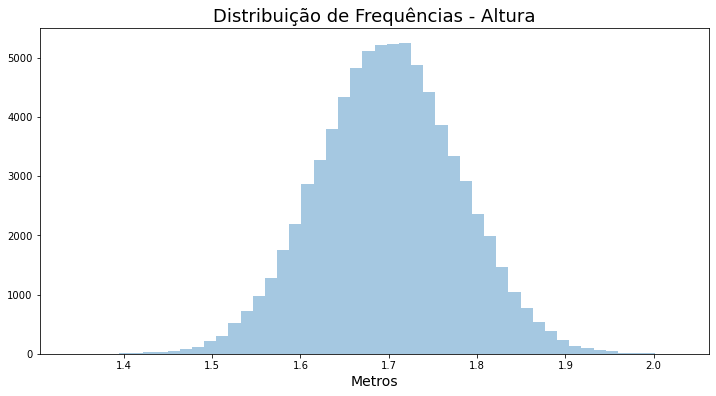

In [47]:
ax = sns.distplot(dados.Altura, kde = False)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 14)
ax

<AxesSubplot:title={'center':'Distribuição de Frequências - Altura - KDE'}, xlabel='Metros', ylabel='Density'>

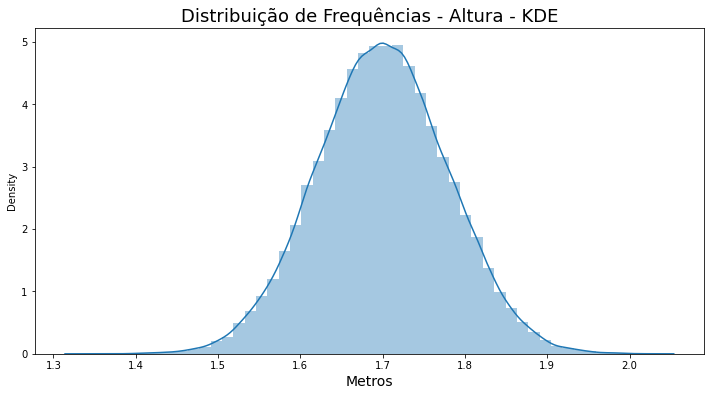

In [48]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 14)
ax

<AxesSubplot:>

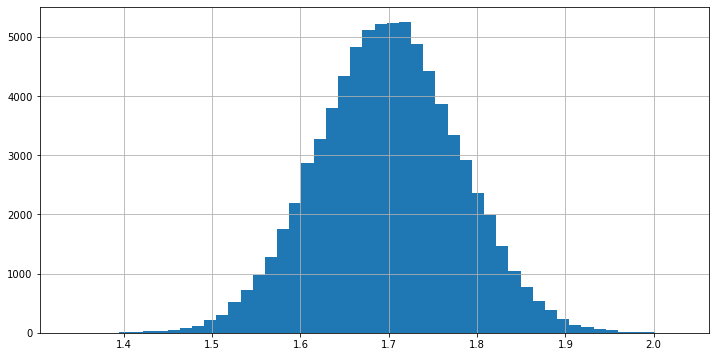

In [49]:
dados.Altura.hist(bins = 50, figsize = (12, 6))

<AxesSubplot:>

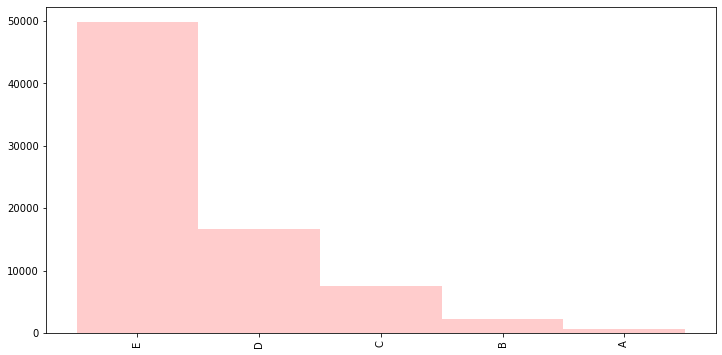

In [50]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width = 1, color = 'red', alpha=0.2, figsize = (12, 6))

# MEDIDA DE TENDÊNCIA CENTRAL

In [51]:
#EXEMPLO
df = pd.DataFrame(data = {'Fulano': [5, 10, 4, 5, 6, 10, 8],
                         'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                         'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                         index = ['Matemática',
                         'Português',
                         'Inglês',
                         'Geografia',
                         'História',
                         'Física',
                         'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,5,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,5,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [52]:
df['Fulano'].mean()

6.857142857142857

In [53]:
dados.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

### Exercícios

In [54]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [55]:
dataset.groupby(['Sexo'])['Idade'].mean()

Sexo
H    45.750000
M    46.333333
Name: Idade, dtype: float64

In [56]:
dataset['Idade'].mean()

46.1

In [57]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [58]:
dataset.groupby(['Sexo'])['Idade'].mean()

Sexo
H    45.750000
M    46.333333
Name: Idade, dtype: float64

# Mediana

In [59]:
notas_fulano = df.Fulano

In [60]:
notas_fulano = notas_fulano.sort_values()

In [61]:
notas_fulano = notas_fulano.reset_index()
notas_fulano

,index,Fulano
0,Inglês,4
1,Matemática,5
2,Geografia,5
3,História,6
4,Química,8
5,Português,10
6,Física,10


In [62]:
n = notas_fulano.shape[0]
n

7

In [63]:
elemento_md = (n + 1) / 2
elemento_md

4.0

In [64]:
notas_fulano.loc[elemento_md - 1]

index     História
Fulano           6
Name: 3, dtype: object

In [65]:
notas_fulano.median() #Pandas

C:\Users\andre\AppData\Local\Temp/ipykernel_15296/2178026737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  notas_fulano.median() #Pandas


Fulano    6.0
dtype: float64

### Obtendo a mediana do dataset

In [66]:
dados.Renda.median()

1200.0

In [67]:
dados.Renda.quantile() #Mediana também

1200.0

# Moda

In [68]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,5,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,5,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [69]:
df.mode() #Variaveis qualitativas categóricos

Matérias,Fulano,Beltrano,Sicrano
0,5,10.0,8.0
1,10,NaN,NaN


In [70]:
dados.Renda.mode()

0    788
dtype: int64

# Relação entre média, mediana e moda

### Avaliando a variável RENDA

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Renda', ylabel='Density'>

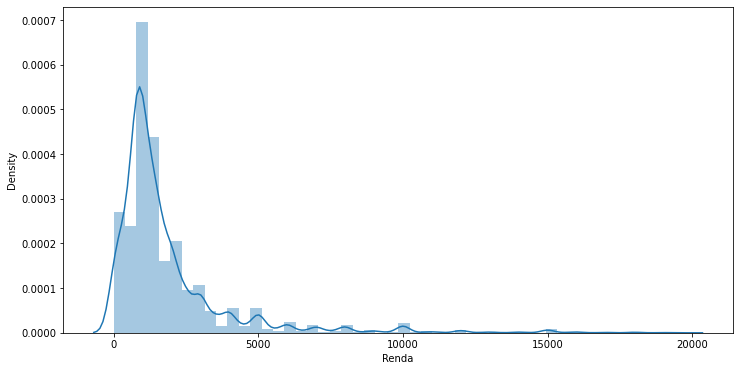

In [71]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12, 6)
ax

In [72]:
moda = dados.Renda.mode()[0]
moda

788

In [73]:
mediana = dados.Renda.median()
mediana

1200.0

In [74]:
media = dados.Renda.mean()
media

2000.3831988547631

In [75]:
moda < mediana < media

True

# Avaliando a variável ANOS DE ESTUDO

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Anos de Estudo', ylabel='Density'>

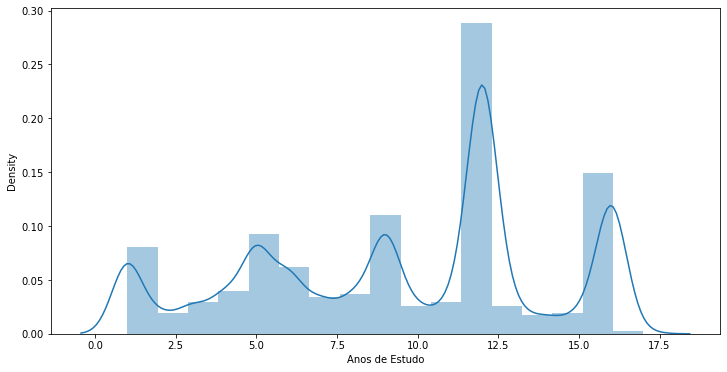

In [76]:
ax = sns.distplot(dados['Anos de Estudo'], bins =17)
ax.figure.set_size_inches(12, 6)
ax

In [77]:
moda = dados['Anos de Estudo'].mode()
moda

0    12
dtype: int64

In [78]:
mediana = dados['Anos de Estudo'].median()
mediana

11.0

In [79]:
media = dados['Anos de Estudo'].mean()
media

9.469664237376367

# Medidas Separatrizes

### Quartis, decis, percentis

In [80]:
dados.Renda.quantile([0.25, 0.50, 0.75]) #divuisão da amostra

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [81]:
[i / 10 for i in range(10)]

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [82]:
dados.Renda.quantile([i / 10 for i in range(10)]) #decis

0.0       0.0
0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [83]:
dados.Renda.quantile([i / 100 for i in range(100)]) #percentis

0.00        0.0
0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 100, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - Acumulada'}, xlabel='Acumulado', ylabel='Valores'>

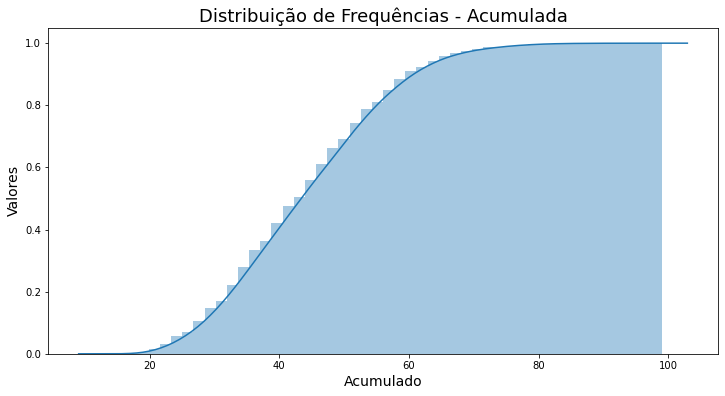

In [84]:
ax = sns.distplot(dados.Idade, 
                  hist_kws= {'cumulative': True},
                  kde_kws = {'cumulative': True})
ax.set_title('Distribuição de Frequências - Acumulada', fontsize = 18)
ax.set_xlabel('Acumulado', fontsize = 14)
ax.set_ylabel('Valores', fontsize = 14)
ax.figure.set_size_inches(12, 6)
ax

### Box-Plot

<AxesSubplot:title={'center':'Altura'}, xlabel='Metros'>

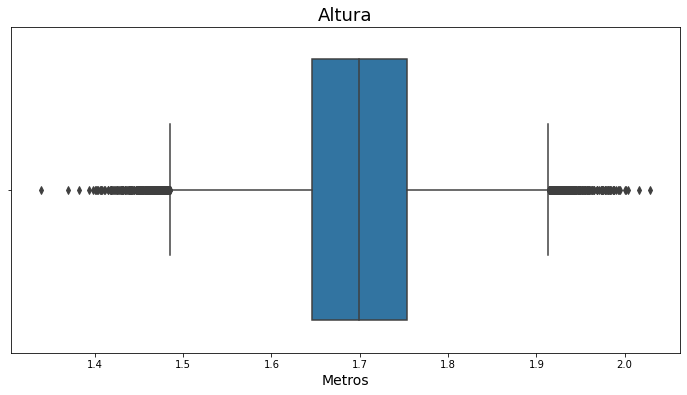

In [85]:
ax = sns.boxplot(x = 'Altura', data = dados, orient='h')
ax.set_title('Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 14)
ax.figure.set_size_inches(12, 6)
ax

<AxesSubplot:title={'center':'Altura'}, xlabel='Metros', ylabel='Sexo'>

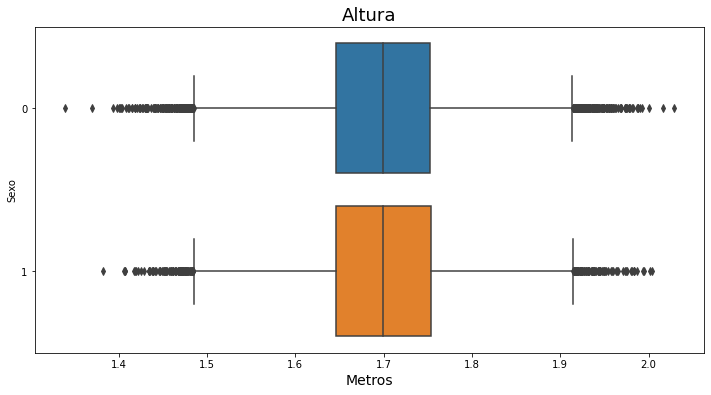

In [86]:
ax = sns.boxplot(x = 'Altura', y='Sexo', data = dados, orient='h')
ax.set_title('Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 14)
ax.figure.set_size_inches(12, 6)
ax

<AxesSubplot:title={'center':'Renda'}, xlabel='R$'>

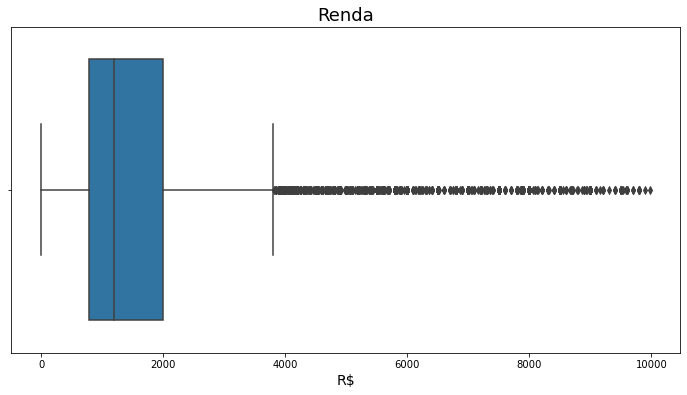

In [87]:
ax = sns.boxplot(x = 'Renda', data = dados.query('Renda < 10000'), orient='h')
ax.set_title('Renda', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)
ax.figure.set_size_inches(12, 6)
ax

<AxesSubplot:title={'center':'Renda'}, xlabel='R$', ylabel='Sexo'>

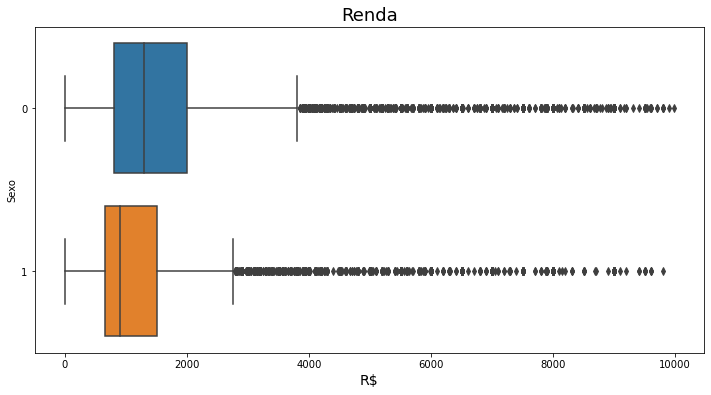

In [88]:
ax = sns.boxplot(x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), orient='h')
ax.set_title('Renda', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)
ax.figure.set_size_inches(12, 6)
ax

<AxesSubplot:title={'center':'Anos de Estudo'}, xlabel='Anos'>

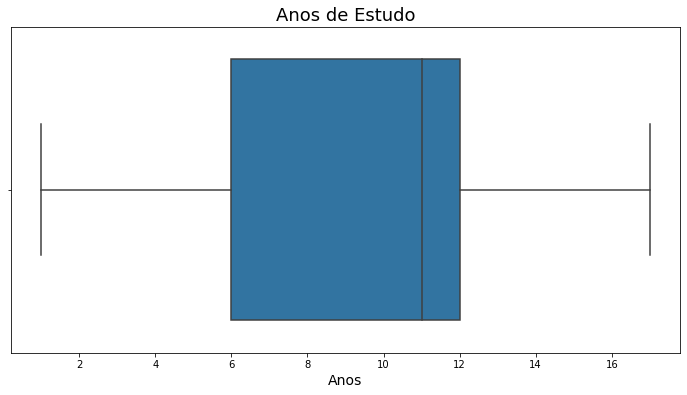

In [89]:
ax = sns.boxplot(x = 'Anos de Estudo', data = dados, orient='h')
ax.set_title('Anos de Estudo', fontsize = 18)
ax.set_xlabel('Anos', fontsize = 14)
ax.figure.set_size_inches(12, 6)
ax

<AxesSubplot:title={'center':'Anos de Estudo'}, xlabel='Anos', ylabel='Sexo'>

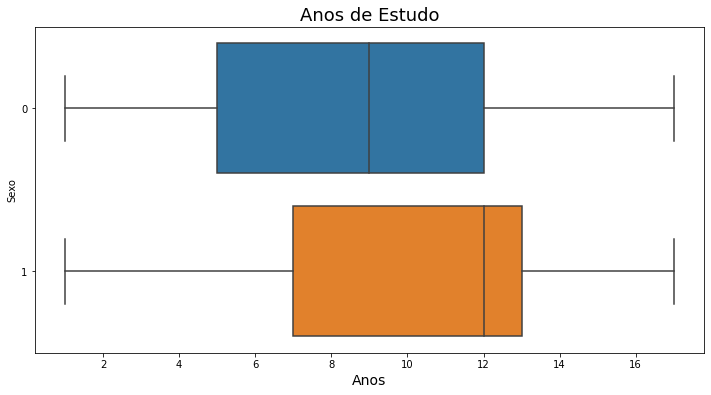

In [90]:
ax = sns.boxplot(x = 'Anos de Estudo', y = 'Sexo', data = dados, orient='h')
ax.set_title('Anos de Estudo', fontsize = 18)
ax.set_xlabel('Anos', fontsize = 14)
ax.figure.set_size_inches(12, 6)
ax

### Exercícios

<AxesSubplot:title={'center':'Renda (R$) - Bahia X São Paulo'}, xlabel='R$', ylabel='UF'>

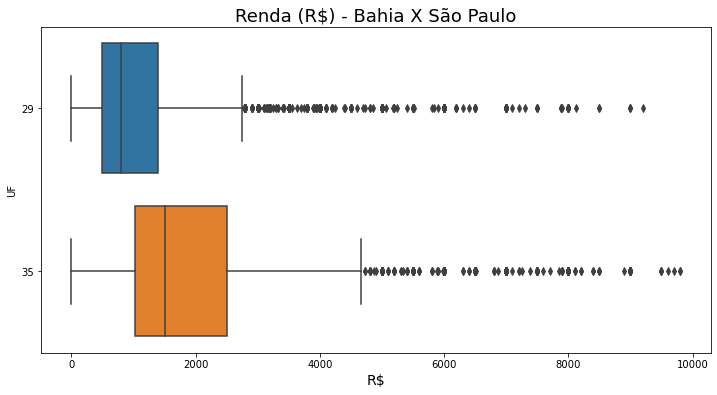

In [91]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('(UF==35 or UF==29) and Renda < 10000'), orient = 'h')

ax.figure.set_size_inches(12, 6)
ax.set_title('Renda (R$) - Bahia X São Paulo', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

# Medidas de Dispersão

In [92]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,5,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,5,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [93]:
df.mean()

Matérias
Fulano      6.857143
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

In [94]:
df.median()

Matérias
Fulano      6.0
Beltrano    3.0
Sicrano     8.0
dtype: float64

In [95]:
notas_fulano = df[['Fulano']]

In [96]:
notas_fulano

Matérias,Fulano
Matemática,5
Português,10
Inglês,4
Geografia,5
História,6
Física,10
Química,8


In [97]:
nota_media_fulano = notas_fulano.mean()[0]

In [98]:
nota_media_fulano

6.857142857142857

In [99]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
notas_fulano

C:\Users\andre\AppData\Local\Temp/ipykernel_15296/349761232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano


Matérias,Fulano,Desvio
Matemática,5,-1.857143
Português,10,3.142857
Inglês,4,-2.857143
Geografia,5,-1.857143
História,6,-0.857143
Física,10,3.142857
Química,8,1.142857


In [100]:
notas_fulano['Desvio'].sum()

2.6645352591003757e-15

In [101]:
notas_fulano['|Desvio|'] = notas_fulano['Desvio'].abs()
notas_fulano[['|Desvio|']]

Matérias,|Desvio|
Matemática,1.857143
Português,3.142857
Inglês,2.857143
Geografia,1.857143
História,0.857143
Física,3.142857
Química,1.142857


In [102]:
notas_fulano['|Desvio|'].mean()

2.1224489795918364

In [103]:
desvio_medio_absoluto = notas_fulano['Fulano'].mad()
desvio_medio_absoluto

2.1224489795918364

### Exercícios

In [104]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]}, 
                  index = ['Matemática', 
                           'Português', 
                           'Inglês', 
                           'Geografia', 
                           'História', 
                           'Física', 
                           'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Sicrano
Matemática,8,7.5
Português,10,8.0
Inglês,4,7.0
Geografia,8,8.0
História,6,8.0
Física,10,8.5
Química,8,7.0


In [105]:
desvio_medio_absoluto = df.Fulano.mad()
desvio_medio_absoluto

1.5510204081632648

In [106]:
desvio_medio_absoluto = df.Sicrano.mad()
desvio_medio_absoluto

0.4693877551020408

# Variância

# Populacional e Amostral

In [107]:
notas_fulano['(Desvio) ^ 2'] = notas_fulano['Desvio'].pow(2)
notas_fulano

Matérias,Fulano,Desvio,|Desvio|,(Desvio) ^ 2
Matemática,5,-1.857143,1.857143,3.448980
Português,10,3.142857,3.142857,9.877551
Inglês,4,-2.857143,2.857143,8.163265
Geografia,5,-1.857143,1.857143,3.448980
História,6,-0.857143,0.857143,0.734694
Física,10,3.142857,3.142857,9.877551
Química,8,1.142857,1.142857,1.306122


In [108]:
notas_fulano['(Desvio) ^ 2'].sum() / (len(notas_fulano) - 1)

6.142857142857143

In [109]:
variancia  = notas_fulano['Fulano'].var()

In [110]:
variancia

6.142857142857143

# Desvio Padrão

In [111]:
np.sqrt(variancia) #amostral

2.4784787961282104

In [112]:
desvio_padrao = notas_fulano['Fulano'].std()
desvio_padrao

2.4784787961282104

In [113]:
df.mean()

Matérias
Fulano     7.714286
Sicrano    7.714286
dtype: float64

In [114]:
df.median()

Matérias
Fulano     8.0
Sicrano    8.0
dtype: float64

In [115]:
df.mode()

Matérias,Fulano,Sicrano
0,8,8.0


In [116]:
df.std()

Matérias
Fulano     2.138090
Sicrano    0.566947
dtype: float64

### Exercícios

In [117]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [118]:
dataset['Idade'].std()

14.184890239656813

In [119]:
dataset.groupby(['Sexo']).std().loc['M']

Idade    16.64532
Name: M, dtype: float64